# Modeling: Timeline Analysis  
The goal of this notebook is to determine if COVID-19 pandemic had an impact on visits in Portuguese attractions and to analyze how it affected them. 

The necessary imports are provided below. We are working with the `cleaned_data.csv` file created during the Data Understanding and Data Preparation notebook.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

We subsetted the Portuguese rows using the attractions' IDs.  

In [3]:
input_file = "cleaned_data.csv" 
data = pd.read_csv(input_file, delimiter=';')

local_ids = ["MAG010", "MAG014", "MAG021", "MAG032", "MAG047", "MAG049", "MAG093"]
sdata = data[data['localID'].isin(local_ids)].copy()


For each year, we counted the number of reviews and calculated the average rating. We used the `reviewRating` column to compute the average, as it specifically represents the ratings for reviews of Portuguese attractions.  

In [4]:
sdata['reviewVisited'] = pd.to_datetime(sdata['reviewVisited'], errors='coerce')

sdata['year'] = sdata['reviewVisited'].dt.year

data_filtered = sdata[sdata['year'].isin([2017, 2018, 2019, 2020, 2021])]

summary = data_filtered.groupby('year').agg(
    total_reviews=('reviewRating', 'count'),
    average_rating=('reviewRating', 'mean')
).reset_index()

print("annual summary:")
print(summary)

annual summary:
   year  total_reviews  average_rating
0  2017              1        3.000000
1  2018            253        4.561265
2  2019           3557        4.420298
3  2020            527        4.415560
4  2021             53        4.415094


We noticed that 2017 only had one entry. To simplify, we merged that data with the entries for the following year, 2018.  
*(We used ChatGPT to assist us with this step. Prompt: "We have this code; add the 2017 data to the 2018 data.")*  


In [5]:
# Incorporate data from 2017 into 2018
if 2017 in summary['year'].values:
    # Select 2017 data
    row_2017 = summary[summary['year'] == 2017].iloc[0]
    
    # Check if 2018 exists
    if 2018 in summary['year'].values:
        # Combine 2017 with 2018
        idx_2018 = summary[summary['year'] == 2018].index[0]
        summary.loc[idx_2018, 'total_reviews'] += row_2017['total_reviews']
        summary.loc[idx_2018, 'average_rating'] = (
            (summary.loc[idx_2018, 'average_rating'] * summary.loc[idx_2018, 'total_reviews'] +
             row_2017['average_rating'] * row_2017['total_reviews']) /
            (summary.loc[idx_2018, 'total_reviews'] + row_2017['total_reviews'])
        )
    
# Remove 2017 data
summary = summary[summary['year'] != 2017]
sdata = sdata[sdata['year'] != 2017]

# Sort the summary by year
summary = summary.sort_values('year').reset_index(drop=True)

# Display the final summary
print("Annual summary:")
print(summary)


Annual summary:
   year  total_reviews  average_rating
0  2018            254        4.555142
1  2019           3557        4.420298
2  2020            527        4.415560
3  2021             53        4.415094


To make the information easier to understand, we created two figures:  
1. **Number of Reviews per Month (2018–2021)**  
2. **Average Rating per Month (2018–2021)** 

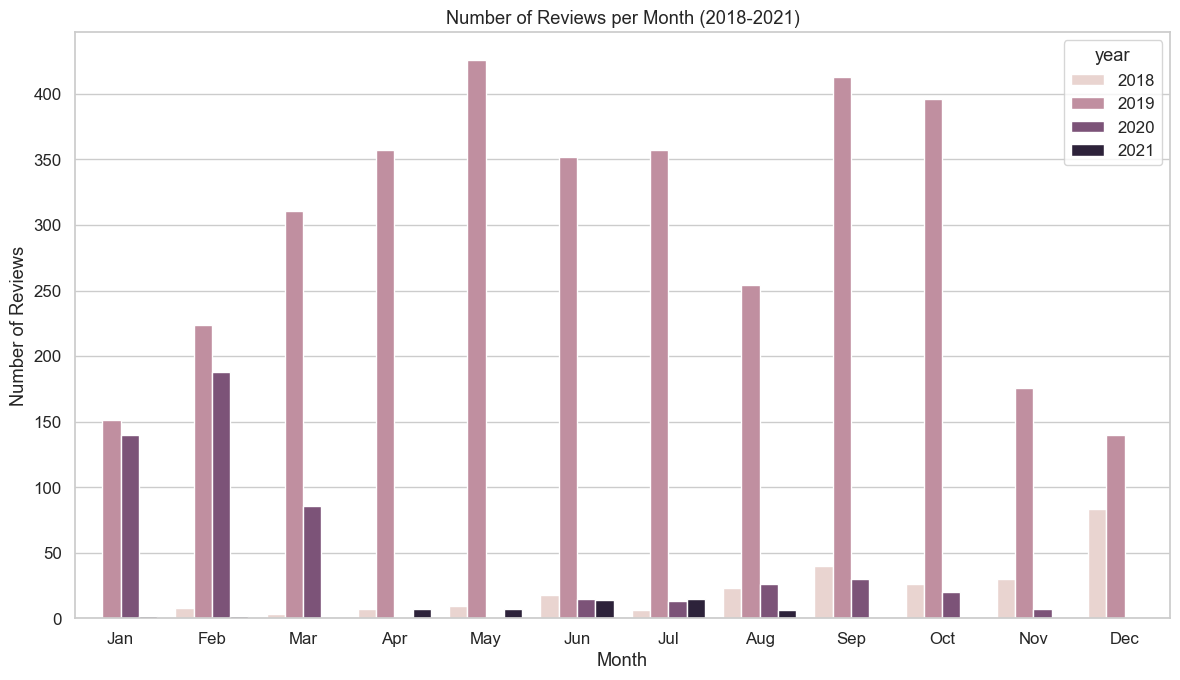

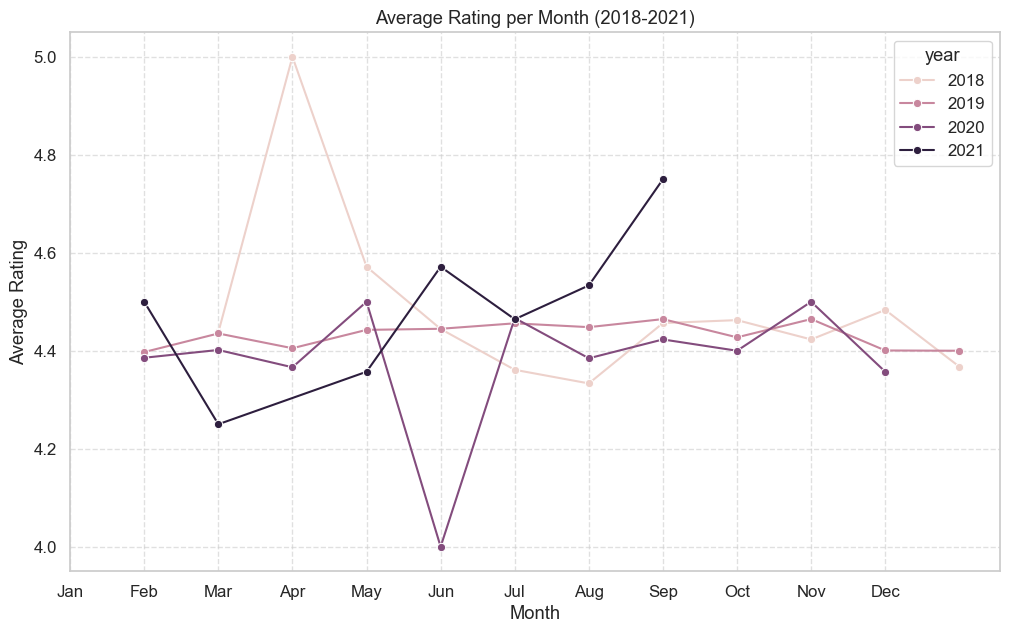

In [6]:
sdata['month'] = sdata['reviewVisited'].dt.month
sns.set_theme(style="whitegrid", palette="Spectral",  font_scale=1.1)

plt.figure(figsize=(12, 7))
sns.countplot(data=sdata, x="month", hue="year")  
plt.title("Number of Reviews per Month (2018-2021)")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
sns.lineplot(data=sdata, x="month", y="globalRating", hue="year", estimator='mean', marker="o", errorbar=None)
plt.title("Average Rating per Month (2018-2021)")
plt.xlabel("Month")
plt.ylabel("Average Rating")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.6)
#plt.tight_layout()
plt.show()




In the next part, we plan to generate bar charts showing Reviews by location name for each year.  

In [7]:
""" local_id_to_name = {
    "MAG010": "Torre de Belém",
    "MAG014": "Mosteiro \n dos Jeronimos",
    "MAG021": "Ponte de \n Dom Luís I",
    "MAG032": "Park and National \n Palace of Pena",
    "MAG047": "Quinta da Regaleira",
    "MAG049": "Cais da Ribeira",
    "MAG093": "Bom Jesus do Monte"
}

sdata['localName'] = sdata['localID'].map(local_id_to_name)

reviews_per_year_local = sdata.groupby(['year', 'localName']).size().unstack(fill_value=0)

sns.set_theme(style="whitegrid", palette="coolwarm", font_scale=1.1)

years = [2018, 2019, 2020, 2021]
for year in years:
    plt.figure(figsize=(10, 6))
    reviews_per_year_local.loc[year].plot(kind='bar', stacked=True, alpha=0.7)
    
    plt.title("Reviews per Local Name - {}".format(year))
    plt.xlabel("Local Name")
    plt.ylabel("Number of Reviews")
    plt.xticks(rotation=0, ha="center", fontsize=10)
    plt.tight_layout()
    plt.show() """

' local_id_to_name = {\n    "MAG010": "Torre de Belém",\n    "MAG014": "Mosteiro \n dos Jeronimos",\n    "MAG021": "Ponte de \n Dom Luís I",\n    "MAG032": "Park and National \n Palace of Pena",\n    "MAG047": "Quinta da Regaleira",\n    "MAG049": "Cais da Ribeira",\n    "MAG093": "Bom Jesus do Monte"\n}\n\nsdata[\'localName\'] = sdata[\'localID\'].map(local_id_to_name)\n\nreviews_per_year_local = sdata.groupby([\'year\', \'localName\']).size().unstack(fill_value=0)\n\nsns.set_theme(style="whitegrid", palette="coolwarm", font_scale=1.1)\n\nyears = [2018, 2019, 2020, 2021]\nfor year in years:\n    plt.figure(figsize=(10, 6))\n    reviews_per_year_local.loc[year].plot(kind=\'bar\', stacked=True, alpha=0.7)\n    \n    plt.title("Reviews per Local Name - {}".format(year))\n    plt.xlabel("Local Name")\n    plt.ylabel("Number of Reviews")\n    plt.xticks(rotation=0, ha="center", fontsize=10)\n    plt.tight_layout()\n    plt.show() '

Then we conclude, it would be easier to just add everyting to the same bar chart.

<Figure size 1400x800 with 0 Axes>

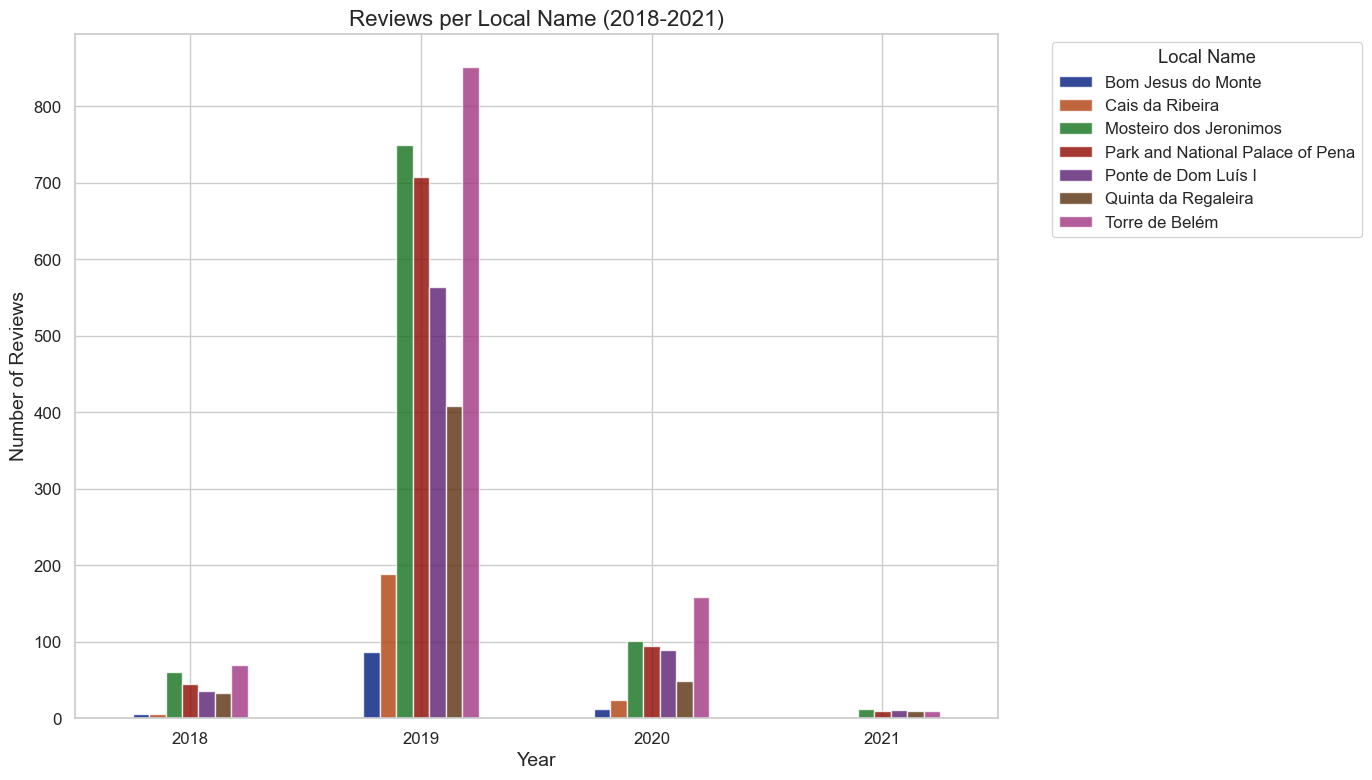

In [8]:
local_id_to_name = {
    "MAG010": "Torre de Belém",
    "MAG014": "Mosteiro dos Jeronimos",
    "MAG021": "Ponte de Dom Luís I",
    "MAG032": "Park and National Palace of Pena",
    "MAG047": "Quinta da Regaleira",
    "MAG049": "Cais da Ribeira",
    "MAG093": "Bom Jesus do Monte"
}

sdata['localName'] = sdata['localID'].map(local_id_to_name)

reviews_per_year_local = sdata.groupby(['year', 'localName']).size().unstack(fill_value=0)
sns.set_theme(style="whitegrid", palette="dark", font_scale=1.1)

plt.figure(figsize=(14, 8))
reviews_per_year_local.plot(kind='bar', stacked=False, alpha=0.8, figsize=(14, 8))

plt.title("Reviews per Local Name (2018-2021)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Reviews", fontsize=14)
plt.xticks(rotation=0, ha="center", fontsize=12)
plt.legend(title="Local Name", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)
plt.tight_layout()
plt.show()


Finally, we will calculate the average rating for each location by year.  

<Figure size 1400x800 with 0 Axes>

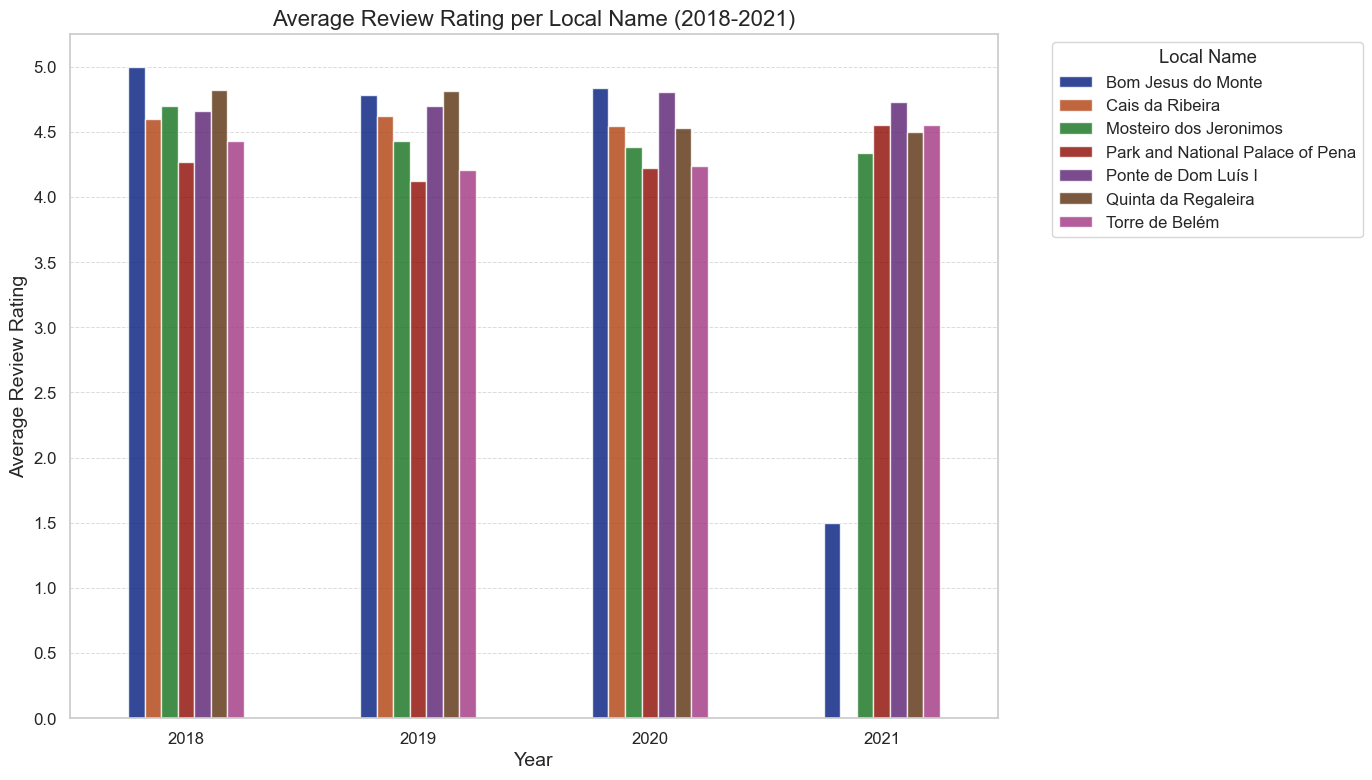

In [ ]:

mean_rating_per_year_local = sdata.groupby(['year', 'localName'])['reviewRating'].mean().unstack(fill_value=0)

sns.set_theme(style="whitegrid", palette="dark", font_scale=1.1)

plt.figure(figsize=(14, 8))
ax = mean_rating_per_year_local.plot(kind='bar', stacked=False, alpha=0.8, figsize=(14, 8))


ax.grid(axis='x', linestyle='', linewidth=0)  
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)  
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.title("Average Review Rating per Local Name (2018-2021)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Review Rating", fontsize=14)
plt.xticks(rotation=0, ha="center", fontsize=12)
plt.legend(title="Local Name", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)
plt.tight_layout()
plt.show()


In [10]:
""" mean_rating_per_year_local = sdata.groupby(['year', 'localName'])['reviewRating'].mean().unstack(fill_value=0)

sns.set_theme(style="whitegrid", palette="dark", font_scale=1.1)

years = [2018, 2019, 2020, 2021]
for year in years:
    plt.figure(figsize=(10, 6))
    mean_rating_per_year_local.loc[year].plot(kind='bar', stacked=True, alpha=0.7)
    
    plt.title(f"Average Review Rating per Local Name - {year}")
    plt.xlabel("Local Name")
    plt.ylabel("Average Review Rating")
    plt.xticks(rotation=0, ha="center", fontsize=10) 
    plt.tight_layout()
    plt.show() """

' mean_rating_per_year_local = sdata.groupby([\'year\', \'localName\'])[\'reviewRating\'].mean().unstack(fill_value=0)\n\nsns.set_theme(style="whitegrid", palette="dark", font_scale=1.1)\n\nyears = [2018, 2019, 2020, 2021]\nfor year in years:\n    plt.figure(figsize=(10, 6))\n    mean_rating_per_year_local.loc[year].plot(kind=\'bar\', stacked=True, alpha=0.7)\n    \n    plt.title(f"Average Review Rating per Local Name - {year}")\n    plt.xlabel("Local Name")\n    plt.ylabel("Average Review Rating")\n    plt.xticks(rotation=0, ha="center", fontsize=10) \n    plt.tight_layout()\n    plt.show() '

The code above was our old code for average rating per local name, with the same logic as our old code for reviews per local name.

Our discussion is on our report.